# Sum of N FM Signals

In [20]:
import numpy as np
import scipy.io.wavfile as sio
import matplotlib.pyplot as plt

## Read message

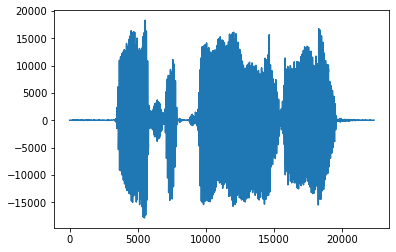

In [33]:
fs_m, m = sio.read('biker.wav')
dt_m = 1/fs_m
plt.plot(m)

## Setup FM signal sampling period

In [34]:
fs_FM = 220000000
dt_FM = 1/fs_FM

## Setup FM signal parameters

In [35]:
A = 1
wc = [87.9 + 0.2*i for i in range(101)]
kf = 1

## Integrate m(t)

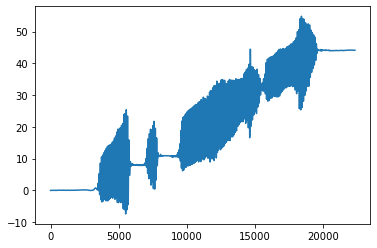

In [107]:
intm = np.zeros(len(m),dtype=np.float32)
intm[0] = m[0]*dt_m
for i in range(1,len(m)):
    intm[i] = intm[i-1] + m[i]*dt_m
plt.plot(intm)

## Output as wav file

In [108]:
sio.write('bikerint.wav', fs_m, intm)

## Make FM waveform

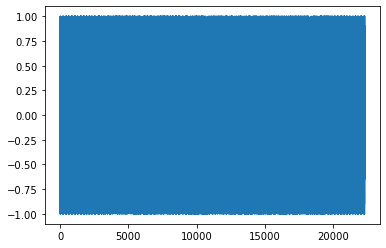

In [116]:
fm = np.zeros(len(m),dtype=np.float32)
for i in range(1,len(m)):
    fm[i] = A * np.cos(wc[0]*1000000*i*dt_m + kf*intm[i])
plt.plot(fm)

## Output as wav file

In [ ]:
sio.write('bikerFM.wav', fs_m, fm)

## Resample for Raspberry Pi